# Classification

# SVM Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

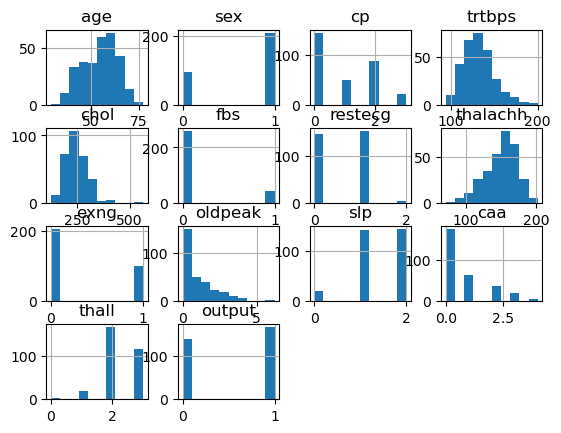

In [2]:
df = pd.read_csv("16325569497737558.csv") 
df.head()
df.hist()

In [3]:
X = df[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall"]]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
Y = df[["output"]]
Y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 4)

In [6]:
from sklearn import svm
from sklearn.metrics import jaccard_score
models = ["linear","rbf","sigmoid"]
l = []
for model in models:
    classification = svm.SVC(kernel = model)
    classification.fit(x_train,y_train)
    y_hat = classification.predict(x_test)
    l.append( jaccard_score(y_test,y_hat,pos_label = 1))
dict = {"linear":l[0],"rbf":l[1],"sigmoid":l[2]}
dict

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'linear': 0.8717948717948718,
 'rbf': 0.6078431372549019,
 'sigmoid': 0.5901639344262295}

In [7]:
from sklearn import svm
from sklearn.metrics import jaccard_score
classification = svm.SVC(kernel = "linear")
classification.fit(x_train,y_train)
y_hat = classification.predict(x_test)
jaccard_score(y_test,y_hat,pos_label = 1)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8717948717948718

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test , y_hat)
cl = classification_report(y_test,y_hat)
print(cm)
print(cl)

[[22  3]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



# KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
neight  = KNeighborsClassifier(n_neighbors = 5)
neight.fit(x_train,y_train)
y_hat2 = neight.predict(x_test)
jaccard_score(y_test,y_hat2,pos_label = 1)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.4583333333333333

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test , y_hat)
cl = classification_report(y_test,y_hat)
print(cm)
print(cl)

[[22  3]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



# Desicion Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini",splitter = "best")
clf.fit(x_train,y_train)
y_hat3 = clf.predict(x_test)
jaccard_score(y_test,y_hat3)

0.7073170731707317

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test , y_hat)
cl = classification_report(y_test,y_hat)
print(cm)
print(cl)

[[22  3]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



# Logistic Regression


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_hat4 = clf.predict(x_test)
jaccard_score(y_test,y_hat4)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.85

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test , y_hat)
cl = classification_report(y_test,y_hat)
print(cm)
print(cl)

[[22  3]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

